In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Task1 Load the datasets
red_wine_data = pd.read_csv('D:/parna/VIT/AI ML internship/winequality-red.csv')

In [29]:
#Task2 Data preprocessing and visualization
red_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [30]:
red_wine_data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [41]:
# Dealing with missing values
red_wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

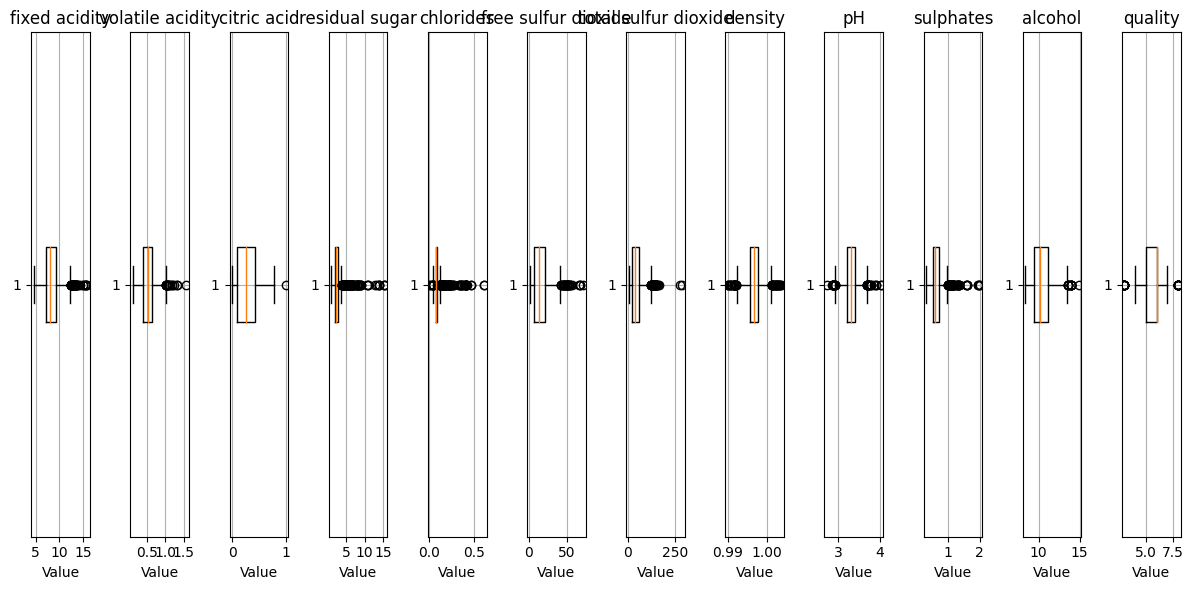

In [32]:
#finding outliers
plt.figure(figsize=(12, 6))
for column in red_wine_data.columns:
    plt.subplot(1, len(red_wine_data.columns), red_wine_data.columns.get_loc(column) + 1)
    plt.boxplot(red_wine_data[column], vert=False)
    plt.title(column)
    plt.xlabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

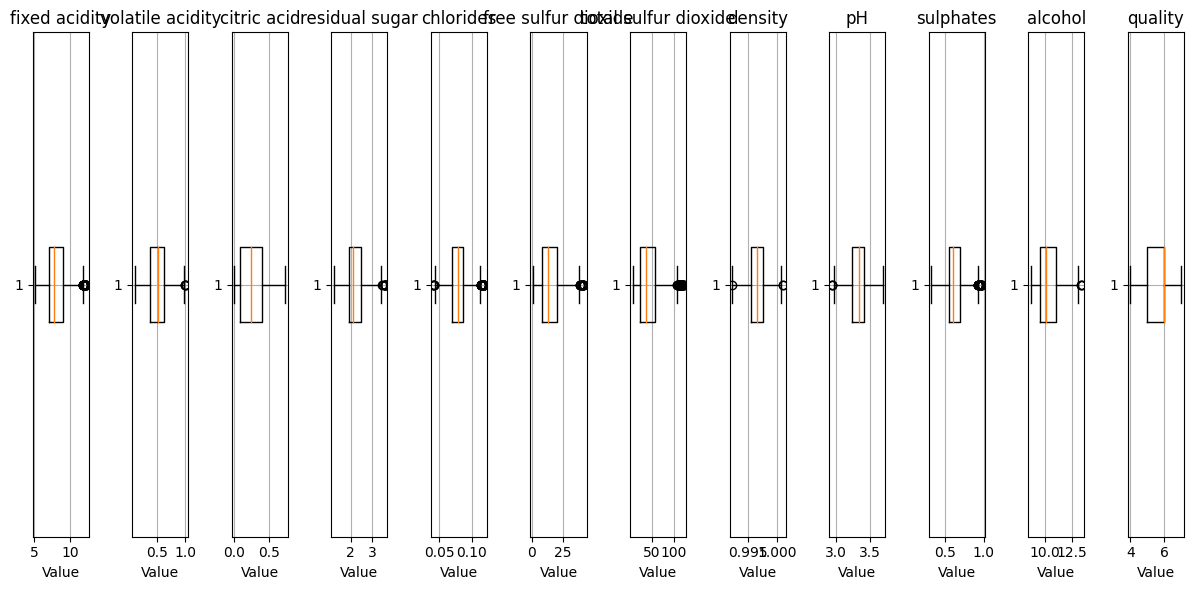

In [33]:
#removing outliers
Q1 = red_wine_data.quantile(0.25)
Q3 = red_wine_data.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
df = red_wine_data[~((red_wine_data < (Q1 - threshold * IQR)) | (red_wine_data > (Q3 + threshold * IQR))).any(axis=1)]

plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.subplot(1, len(df.columns), df.columns.get_loc(column) + 1)
    plt.boxplot(df[column], vert=False)
    plt.title(column)
    plt.xlabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\Parna Chaudhury\AppData\Local\Temp\ipykernel_15904\1910118924.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chlorides)


<Axes: xlabel='chlorides', ylabel='Density'>

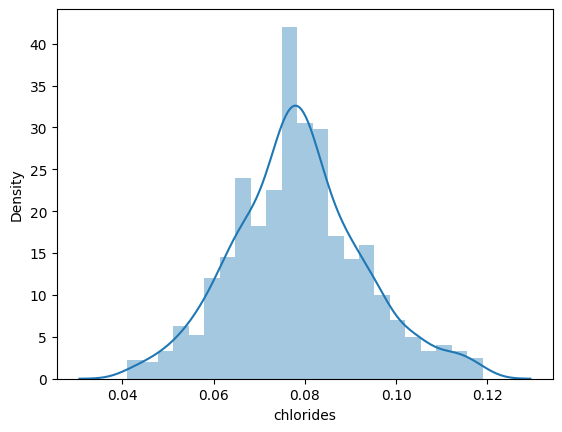

In [34]:
# Univariate Analysis
sns.distplot(df.chlorides)

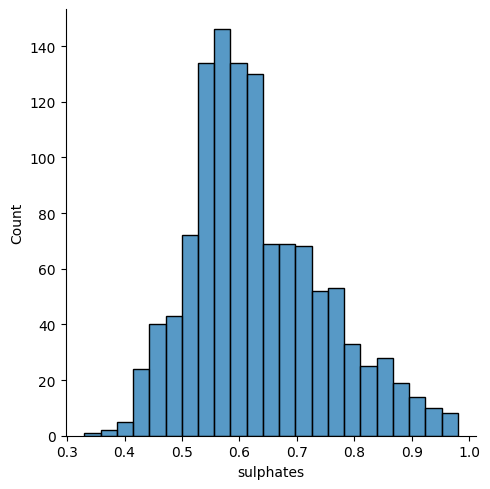

In [35]:
sns.displot(df.sulphates)

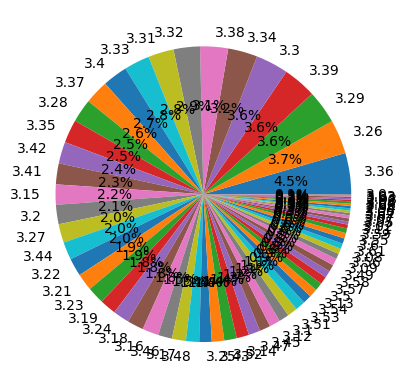

In [36]:
x=df["pH"].value_counts()
plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='chlorides', ylabel='sulphates'>

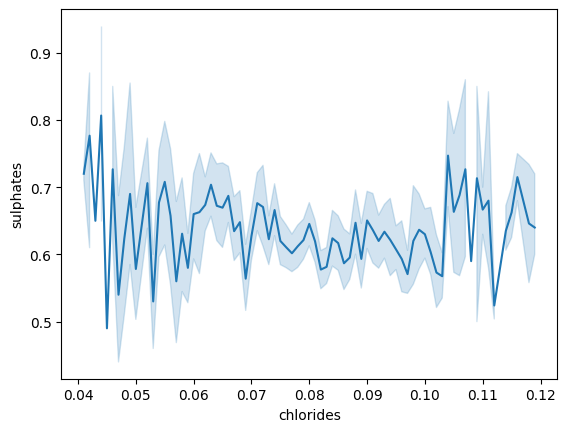

In [37]:
# Bivariate Analysis
sns.lineplot(x=df.chlorides,y=df.sulphates)

<Axes: xlabel='density', ylabel='alcohol'>

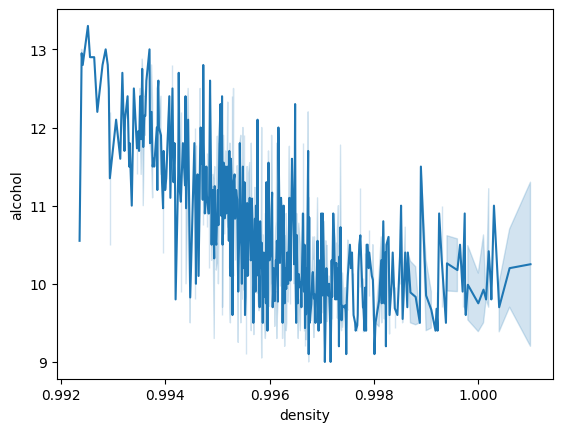

In [38]:
sns.lineplot(x=df.density,y=df.alcohol)

<Axes: xlabel='alcohol', ylabel='sulphates'>

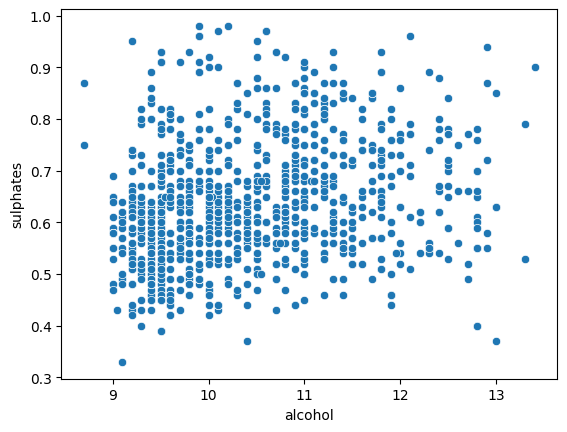

In [39]:
sns.scatterplot(x=df.alcohol,y=df.sulphates)

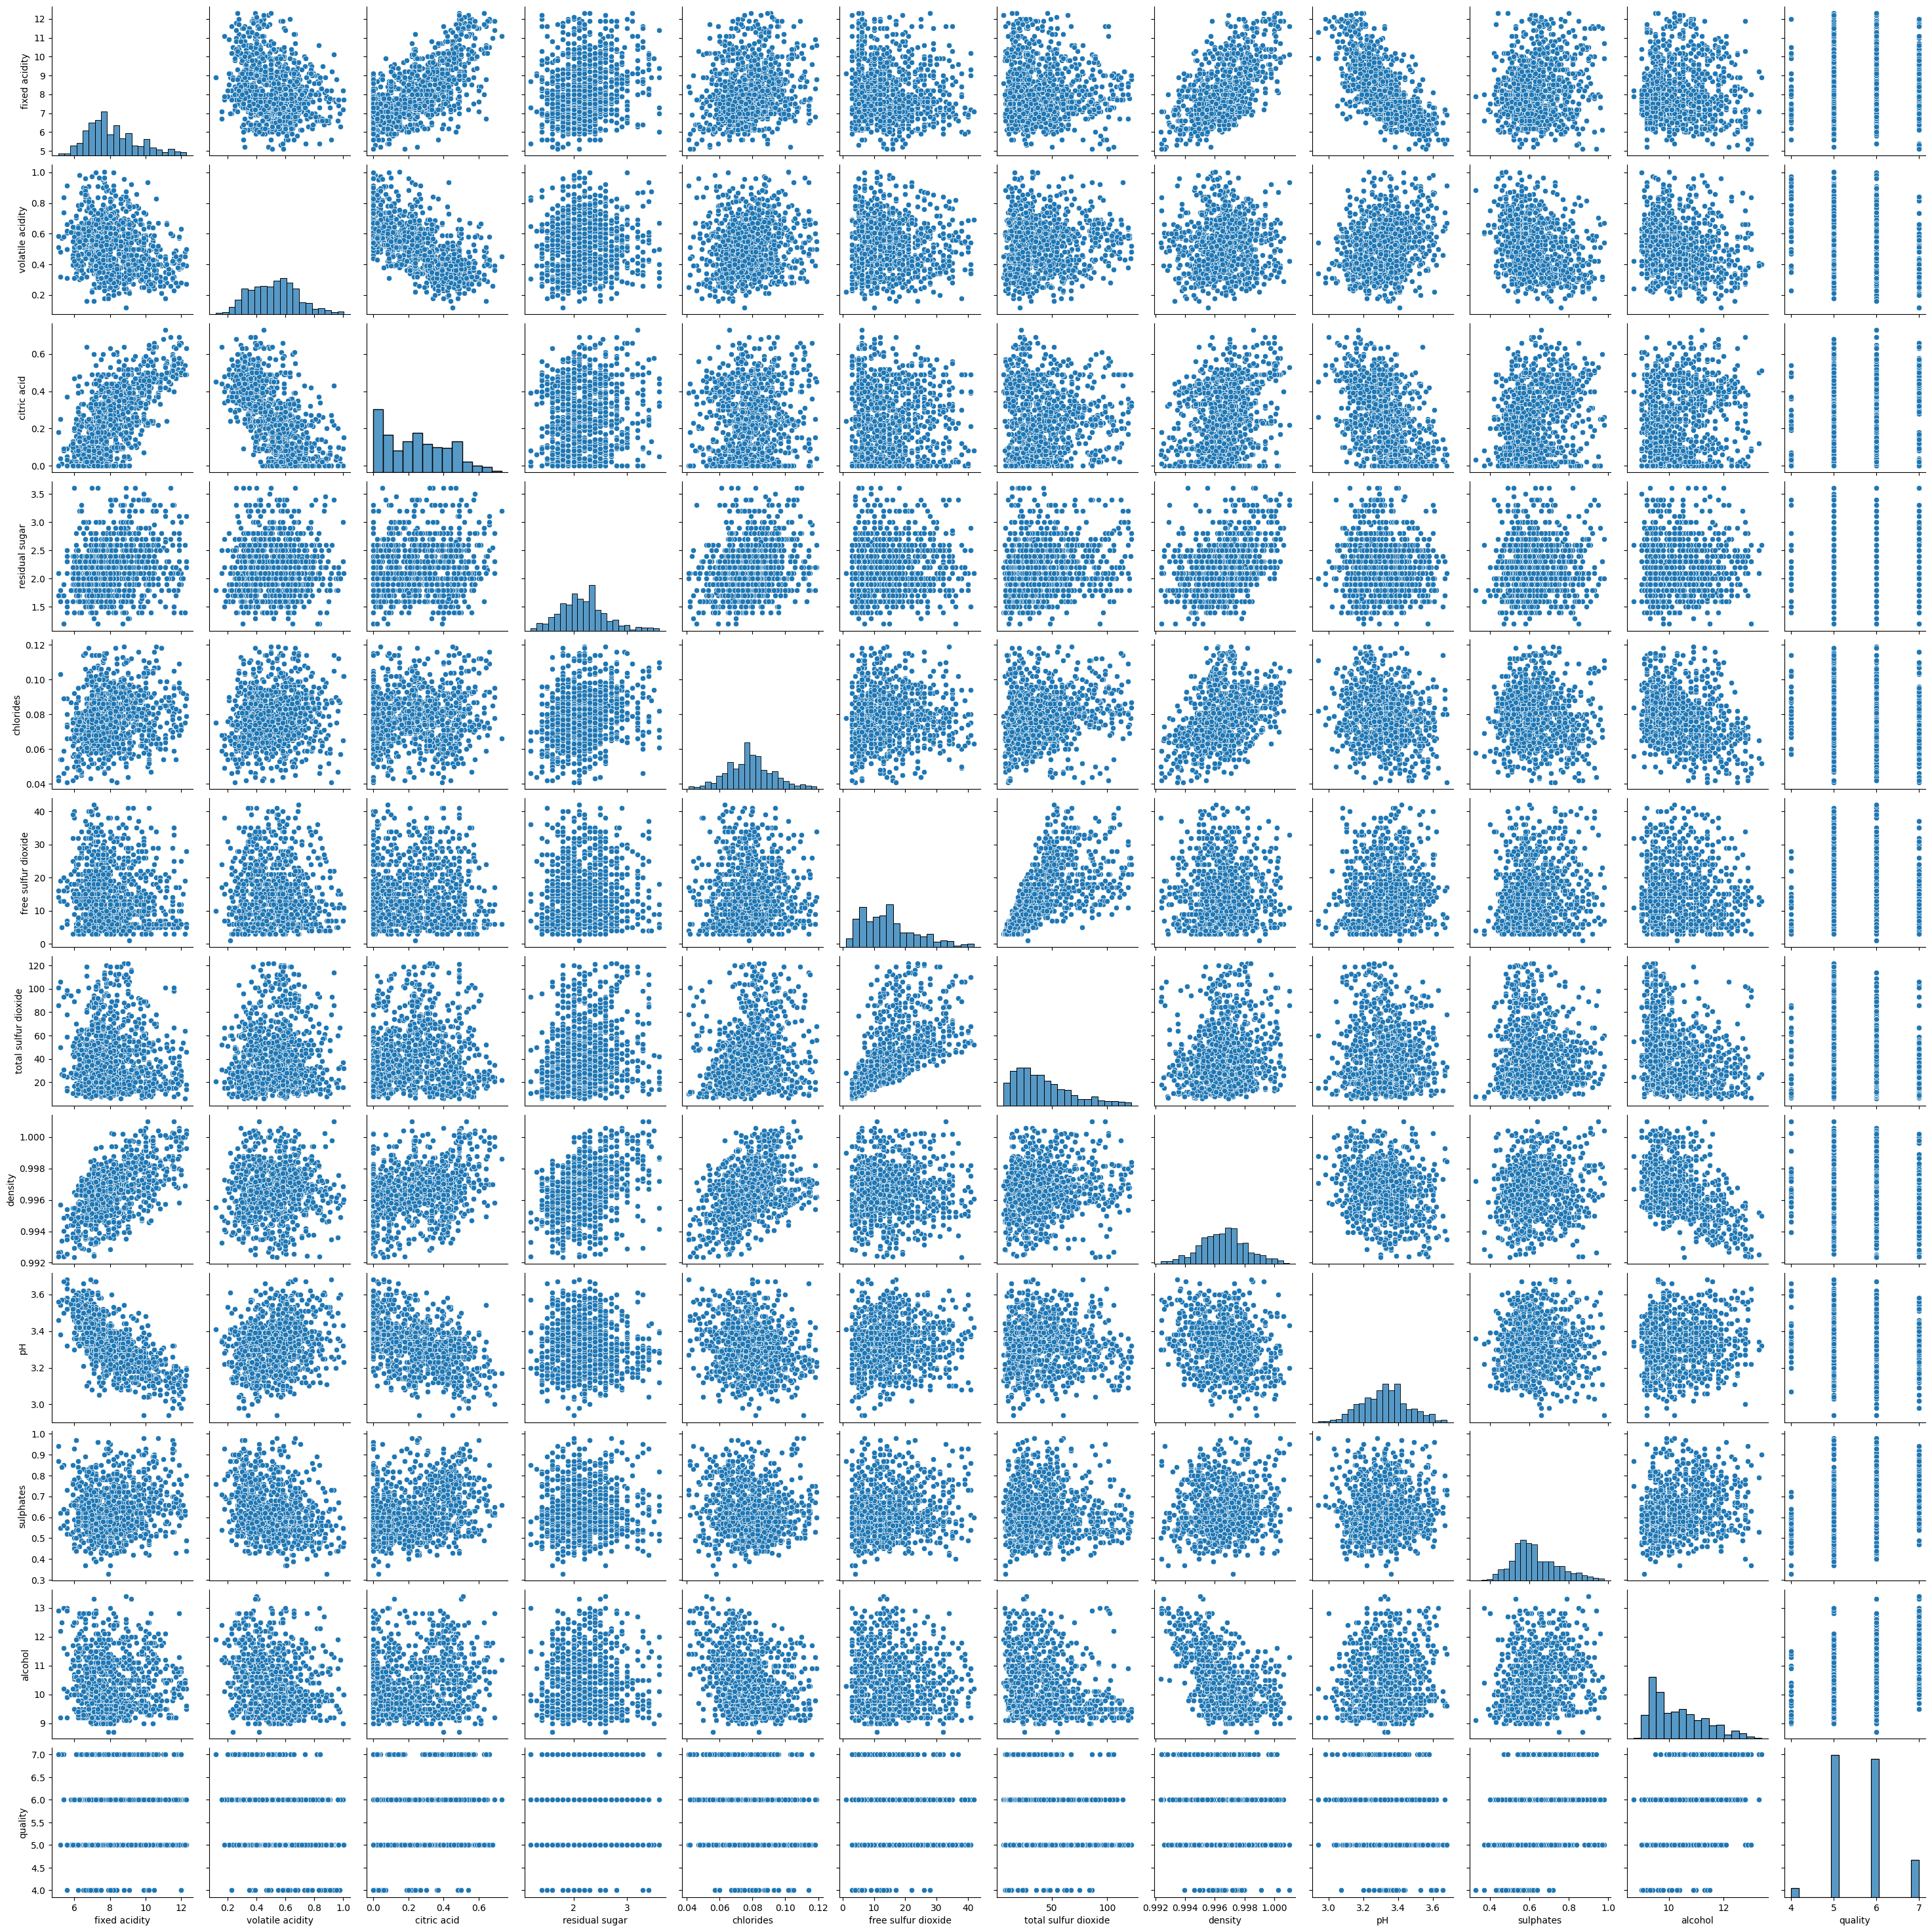

In [40]:
# Multivariate Analysis
sns.pairplot(df)

<Axes: >

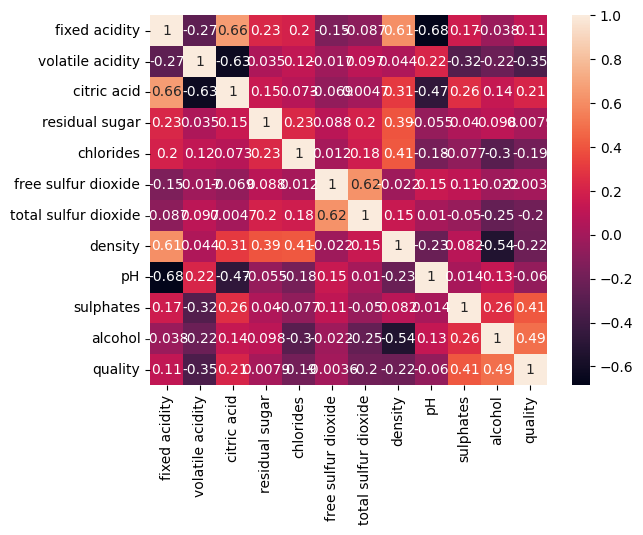

In [42]:
sns.heatmap(df.corr(),annot=True)

In [43]:
#Task3 Build a Linear Regression model
y = df['quality']
X = df.drop(columns = ['quality'],axis =1)
scale =StandardScaler()
X_scaled =pd.DataFrame(scale.fit_transform(X),columns = X.columns)
X_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   
1      -0.248346          2.174284    -1.375744        0.940570   1.356569   
2      -0.248346          1.443297    -1.152735        0.259965   0.937312   
3       2.084173         -1.480652     1.746386       -0.647508  -0.250582   
4      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.457421             -0.316839  0.763633  1.407839  -0.614084   
1             1.135446              0.947754  0.135771 -0.946440   0.419963   
2            -0.002316              0.449581  0.261343 -0.490773   0.161451   
3             0.225236              0.679507  0.889206 -1.250217  -0.441743   
4            -0.457421             -0.316839  0.763633  1.407839  -0.614084   

    alcohol  
0 -0.986764  
1 -0.571630  
2 -0.571630  
3 -0.571630  
4 -0.986764

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2,random_state =0)
X_train = scale.fit_transform(x_train)
X_test = scale.transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(X_test)
pred

c:\Users\Parna Chaudhury\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([5, 5, 6, 6, 7, 6, 6, 6, 6, 5, 7, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 7, 5,
       5, 6, 7, 5, 5, 6, 6, 5, 7, 6, 6, 5, 7, 7, 7, 6, 5, 6, 5, 5, 6, 6,
       6, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 6, 5,
       6, 4, 6, 5, 5, 5, 6, 5, 6, 5, 6, 7, 7, 5, 5, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 7, 5, 6, 7, 5, 6, 6, 6, 5,
       5, 5, 5, 6, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 5, 6, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5, 5, 6,
       6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7,
       5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 7, 5, 6, 6,
       5, 5, 7, 6, 7, 6, 6, 6, 7, 6, 7, 5, 6, 7, 6, 5], dtype=int64)

In [45]:
y_test

224     4
1283    6
609     6
514     7
953     7
       ..
687     5
385     6
964     6
815     5
63      5
Name: quality, Length: 236, dtype: int64

In [46]:
#Task4 Evaluate the model
accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.576271186440678
Confusion Matrix:
 [[ 0  4  1  0]
 [ 0 66 37  3]
 [ 1 21 60 12]
 [ 0  1 20 10]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.72      0.62      0.67       106
           6       0.51      0.64      0.57        94
           7       0.40      0.32      0.36        31

    accuracy                           0.58       236
   macro avg       0.41      0.40      0.40       236
weighted avg       0.58      0.58      0.57       236



In [47]:
#Task5 Test with a random observation 
random_observation = [[7.2, 0.32, 0.47, 5.1, 0.033, 20, 197, 0.9946, 3.11, 0.45, 9.1]]
predicted_quality = model.predict(random_observation)
print(f"Predicted Wine Quality: {predicted_quality[0]}")

Predicted Wine Quality: 5


c:\Users\Parna Chaudhury\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
#GIT Link: https://github.com/parnachaudhury/AI-ML/blob/main/AI%20ML%20Assignment-4.ipynb